# Tecnologias e Aplicações

## Variational Autoencoder

In [9]:
from vae import *

In [10]:
# Fetch and prepare data
data = fetch_data("../data/chinese_mnist")

# Make and compile model
model = make_model()

# Train or load model
EPOCHS = 40
model = train(model, data, EPOCHS, save_path="../models")

[INFO] Model wans't found, generating ...
[INFO] Training Model ...
Epoch 1, loss: 373.12744140625, reconst loss: 359.20379638671875, KL loss: 13.923484802246094
Epoch 2, loss: 156.463134765625, reconst loss: 151.0400390625, KL loss: 5.423107624053955
Epoch 3, loss: 147.10763549804688, reconst loss: 139.52420043945312, KL loss: 7.583477020263672
Epoch 4, loss: 142.30104064941406, reconst loss: 133.98802185058594, KL loss: 8.31306266784668
Epoch 5, loss: 138.77783203125, reconst loss: 130.08116149902344, KL loss: 8.696630477905273
Epoch 6, loss: 136.49945068359375, reconst loss: 127.59578704833984, KL loss: 8.903634071350098
Epoch 7, loss: 135.09129333496094, reconst loss: 125.8347396850586, KL loss: 9.256593704223633
Epoch 8, loss: 134.00662231445312, reconst loss: 124.28475189208984, KL loss: 9.721844673156738
Epoch 9, loss: 133.2230224609375, reconst loss: 123.04702758789062, KL loss: 10.176030158996582
Epoch 10, loss: 132.3877716064453, reconst loss: 121.64282989501953, KL loss: 10.

In [11]:
# Get predictions for dataset
preds = predict_all(model, data)

[INFO] Predicting set


In [12]:
print("[INFO] Displaying some results")
def display_from_dataset(i):
    data_set = list(data[0][0])

    (a,b) = divmod(i,BATCH_SIZE)
    
    original = data_set[a][0].numpy()[b]
    predicted = preds[i]

    color = 'viridis'

    fig, axarr = plt.subplots(1,2)
    axarr[0].imshow(original, cmap=color)
    axarr[0].set_title("original")
    axarr[0].axis('off')
    axarr[1].imshow(predicted, cmap=color)
    axarr[1].set_title("predicted")
    axarr[1].axis('off')

    fig.tight_layout()
    plt.show()

[INFO] Displaying some results


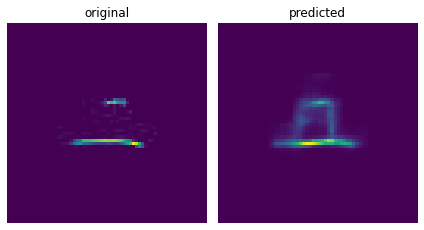

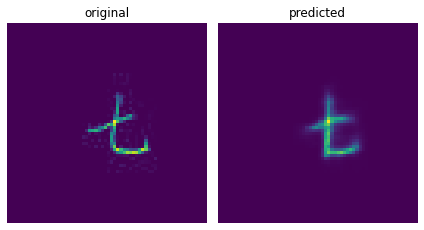

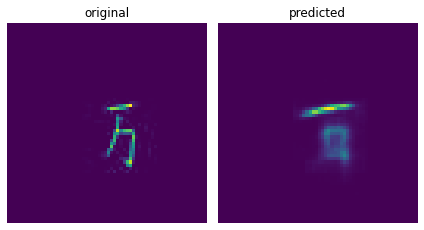

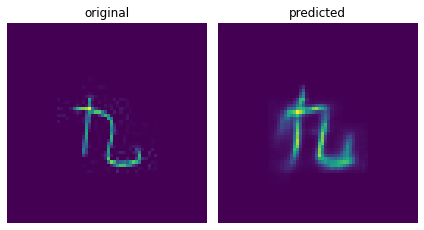

In [13]:
display_from_dataset(0)
display_from_dataset(1)
display_from_dataset(2)
display_from_dataset(3)

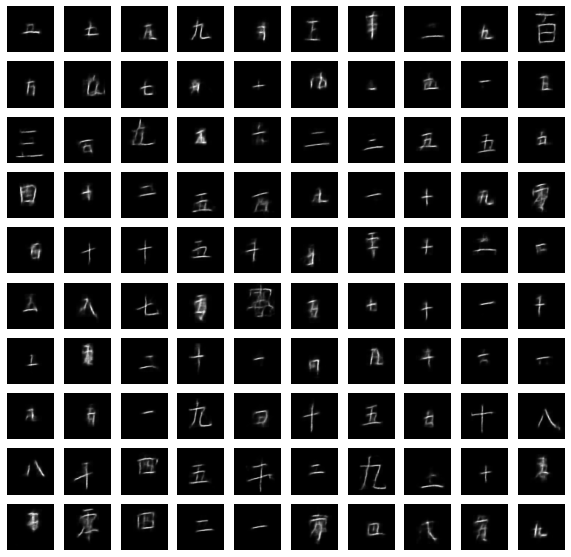

In [14]:
#from utils import *
import numpy as np
encoder, decoder, vae = model
(train_dataset, train_len), (test_dataset, test_len) = data
    
samples = []
    
for train_x, _ in train_dataset:
    z, mean, logvar = encoder(train_x)
    samples.extend(decoder(z).numpy())
        
show_samples(samples[:100])